# Introduction to the problem

Coronary artery disease involves the reduction of blood flow to the heart muscle due to build-up of plaque in the arteries of the heart. It is the most common of the cardiovascular diseases. In many cases, the first sign is a heart attack.

Diagnosis is not easy and often early stages of the disease are missed. We have gathered data on patients with a suspicion of coronary disease. Let’s try to predict whether our patients have coronary problems.

In dataset `train_set.csv` we have known cases. `test_set.csv` contains some undiagnosed cases that we would like to predict.

### Imports

In [1]:
# We should start with neccessary data imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
sb.set_style('darkgrid')
import sys
import numpy as np
sys.path.append('..')
plt.style.use('fivethirtyeight')

# The following line enables plots in jupyter noteboks
%matplotlib inline

### Loading data ...

In [2]:
# df stands for Dataframe this is one of the core pandas library data structures. Every column in a Dataframe is a Series.
df = pd.read_csv('../data/raw/train_set.csv', sep=',')

Dataset fields:

1. age: age in years  
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
	- Value 1: typical angina
	- Value 2: atypical angina
	- Value 3: non-anginal pain
	- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
	- Value 0: normal
	- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
	- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
	- Value 1: upsloping
	- Value 2: flat
	- Value 3: downsloping
12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
13. hd: heart disease 0 = healthy, 1 = sick (with at least one major vessels that has > 50% diameter narrowing)

In [3]:
df.head()

patientid  age  sex  cp trestbps   chol  fbs restecg thalach exang  \
0          0   65    1   4    135.0  254.0  0.0     2.0   127.0   0.0   
1          4   50    1   4    130.0  233.0  0.0     0.0   121.0   1.0   
2          7   45    0   4    132.0  297.0  0.0     0.0   144.0   0.0   
3         11   46    0   2    105.0  204.0  0.0     0.0   172.0   0.0   
4         12   58    0   4    100.0  248.0  0.0     2.0   122.0   0.0   

   oldpeak slope thal  hd  
0      2.8   2.0  7.0   1  
1      2.0   2.0  7.0   1  
2      0.0     ?    ?   0  
3      0.0   1.0  3.0   0  
4      1.0   2.0  3.0   0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 14 columns):
patientid    358 non-null int64
age          358 non-null int64
sex          358 non-null int64
cp           358 non-null int64
trestbps     358 non-null object
chol         358 non-null object
fbs          358 non-null object
restecg      358 non-null object
thalach      358 non-null object
exang        358 non-null object
oldpeak      358 non-null float64
slope        358 non-null object
thal         358 non-null object
hd           358 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 28.0+ KB


In [5]:
df["fbs"].value_counts()

0.0    312
1.0     40
?        6
Name: fbs, dtype: int64

In [7]:
for column in df:
    if df[column].dtypes == object:
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 14 columns):
patientid    358 non-null int64
age          358 non-null int64
sex          358 non-null int64
cp           358 non-null int64
trestbps     357 non-null float64
chol         344 non-null float64
fbs          352 non-null float64
restecg      357 non-null float64
thalach      357 non-null float64
exang        357 non-null float64
oldpeak      358 non-null float64
slope        248 non-null float64
thal         200 non-null float64
hd           358 non-null int64
dtypes: float64(9), int64(5)
memory usage: 39.2 KB


In [9]:
df.to_csv('../data/processed/dfwithnan.csv', sep=',', index=False)

In [10]:
df[df['fbs'].isnull()]

patientid  age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
15          27   41    1   4     120.0  237.0  NaN      0.0    138.0    1.0   
32          48   54    0   2     140.0  309.0  NaN      1.0    140.0    0.0   
114        191   46    1   3     150.0  163.0  NaN      0.0    116.0    0.0   
252        419   49    1   4     120.0  297.0  NaN      0.0    132.0    0.0   
272        461   38    0   2     120.0  275.0  NaN      0.0    129.0    0.0   
330        552   53    0   2     113.0  468.0  NaN      0.0    127.0    0.0   

     oldpeak  slope  thal  hd  
15       1.0    2.0   NaN   1  
32       0.0    NaN   NaN   0  
114      0.0    NaN   NaN   0  
252      1.0    2.0   NaN   0  
272      0.0    NaN   NaN   0  
330      0.0    NaN   NaN   0

In [11]:
df['slope'].value_counts(dropna=False)

2.0    137
NaN    110
1.0     99
3.0     12
Name: slope, dtype: int64

In [12]:
df.describe()

patientid         age         sex          cp    trestbps        chol  \
count  358.000000  358.000000  358.000000  358.000000  357.000000  344.000000   
mean   297.907821   51.335196    0.695531    3.092179  132.022409  247.898256   
std    173.880347    8.772854    0.460826    0.972965   17.803375   56.462982   
min      0.000000   29.000000    0.000000    1.000000   94.000000  100.000000   
25%    152.250000   45.250000    0.000000    2.000000  120.000000  209.750000   
50%    299.500000   52.000000    1.000000    3.000000  130.000000  242.500000   
75%    455.250000   57.000000    1.000000    4.000000  140.000000  282.000000   
max    596.000000   74.000000    1.000000    4.000000  200.000000  529.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  352.000000  357.000000  357.000000  357.000000  358.000000  248.000000   
mean     0.113636    0.596639  145.207283    0.322129    0.778492    1.649194   
std      0.317821    0.861009   23.287810    0.467948    1.068422    0.570815   
min      0.000000    0.000000   82.000000    0.000000    0.000000    1.000000   
25%      0.000000    0.000000  129.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  147.000000    0.000000    0.100000    2.000000   
75%      0.000000    1.000000  163.000000    1.000000    1.400000    2.000000   
max      1.000000    2.000000  195.000000    1.000000    6.200000    3.000000   

             thal          hd  
count  200.000000  358.000000  
mean     4.875000    0.405028  
std      1.951517    0.491585  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

In [13]:
df_withoutna = df.dropna()

In [14]:
df_withoutna.describe()

patientid         age         sex          cp    trestbps        chol  \
count  191.00000  191.000000  191.000000  191.000000  191.000000  191.000000   
mean   300.60733   54.172775    0.664921    3.183246  132.104712  247.287958   
std    168.02947    8.932289    0.473258    0.941964   17.828408   51.769589   
min      0.00000   34.000000    0.000000    1.000000   94.000000  131.000000   
25%    172.00000   48.000000    0.000000    2.500000  120.000000  209.500000   
50%    307.00000   56.000000    1.000000    3.000000  130.000000  241.000000   
75%    446.50000   60.000000    1.000000    4.000000  140.000000  282.000000   
max    595.00000   74.000000    1.000000    4.000000  200.000000  417.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  191.000000  191.000000  191.000000  191.000000  191.000000  191.000000   
mean     0.157068    0.910995  150.890052    0.356021    0.974869    1.581152   
std      0.364821    0.993365   22.610977    0.480080    1.140682    0.600404   
min      0.000000    0.000000   88.000000    0.000000    0.000000    1.000000   
25%      0.000000    0.000000  133.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  155.000000    0.000000    0.600000    2.000000   
75%      0.000000    2.000000  168.000000    1.000000    1.600000    2.000000   
max      1.000000    2.000000  195.000000    1.000000    6.200000    3.000000   

             thal          hd  
count  191.000000  191.000000  
mean     4.853403    0.434555  
std      1.959988    0.497001  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

In [15]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
imputer.fit(df)

c:\users\mrajewsk\desktop\ai_aware\digital-wks-dsc\env\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [16]:
matrix_mediana_na = imputer.transform(df)

In [17]:
matrix_mediana_na

array([[  0.,  65.,   1., ...,   2.,   7.,   1.],
       [  4.,  50.,   1., ...,   2.,   7.,   1.],
       [  7.,  45.,   0., ...,   2.,   3.,   0.],
       ...,
       [593.,  51.,   0., ...,   1.,   3.,   0.],
       [595.,  64.,   1., ...,   2.,   7.,   0.],
       [596.,  30.,   0., ...,   2.,   6.,   0.]])

In [18]:
df_median_na = pd.DataFrame(matrix_mediana_na, columns=df.columns)

In [19]:
df_median_na.describe()

patientid         age         sex          cp    trestbps        chol  \
count  358.000000  358.000000  358.000000  358.000000  358.000000  358.000000   
mean   297.907821   51.335196    0.695531    3.092179  132.016760  247.687151   
std    173.880347    8.772854    0.460826    0.972965   17.778744   55.354712   
min      0.000000   29.000000    0.000000    1.000000   94.000000  100.000000   
25%    152.250000   45.250000    0.000000    2.000000  120.000000  211.000000   
50%    299.500000   52.000000    1.000000    3.000000  130.000000  242.500000   
75%    455.250000   57.000000    1.000000    4.000000  140.000000  278.500000   
max    596.000000   74.000000    1.000000    4.000000  200.000000  529.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  358.000000  358.000000  358.000000  358.000000  358.000000  358.000000   
mean     0.111732    0.594972  145.212291    0.321229    0.778492    1.756983   
std      0.315477    0.860381   23.255364    0.467602    1.068422    0.501699   
min      0.000000    0.000000   82.000000    0.000000    0.000000    1.000000   
25%      0.000000    0.000000  129.250000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  147.000000    0.000000    0.100000    2.000000   
75%      0.000000    1.000000  163.000000    1.000000    1.400000    2.000000   
max      1.000000    2.000000  195.000000    1.000000    6.200000    3.000000   

             thal          hd  
count  358.000000  358.000000  
mean     4.047486    0.405028  
std      1.729779    0.491585  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      6.000000    1.000000  
max      7.000000    1.000000

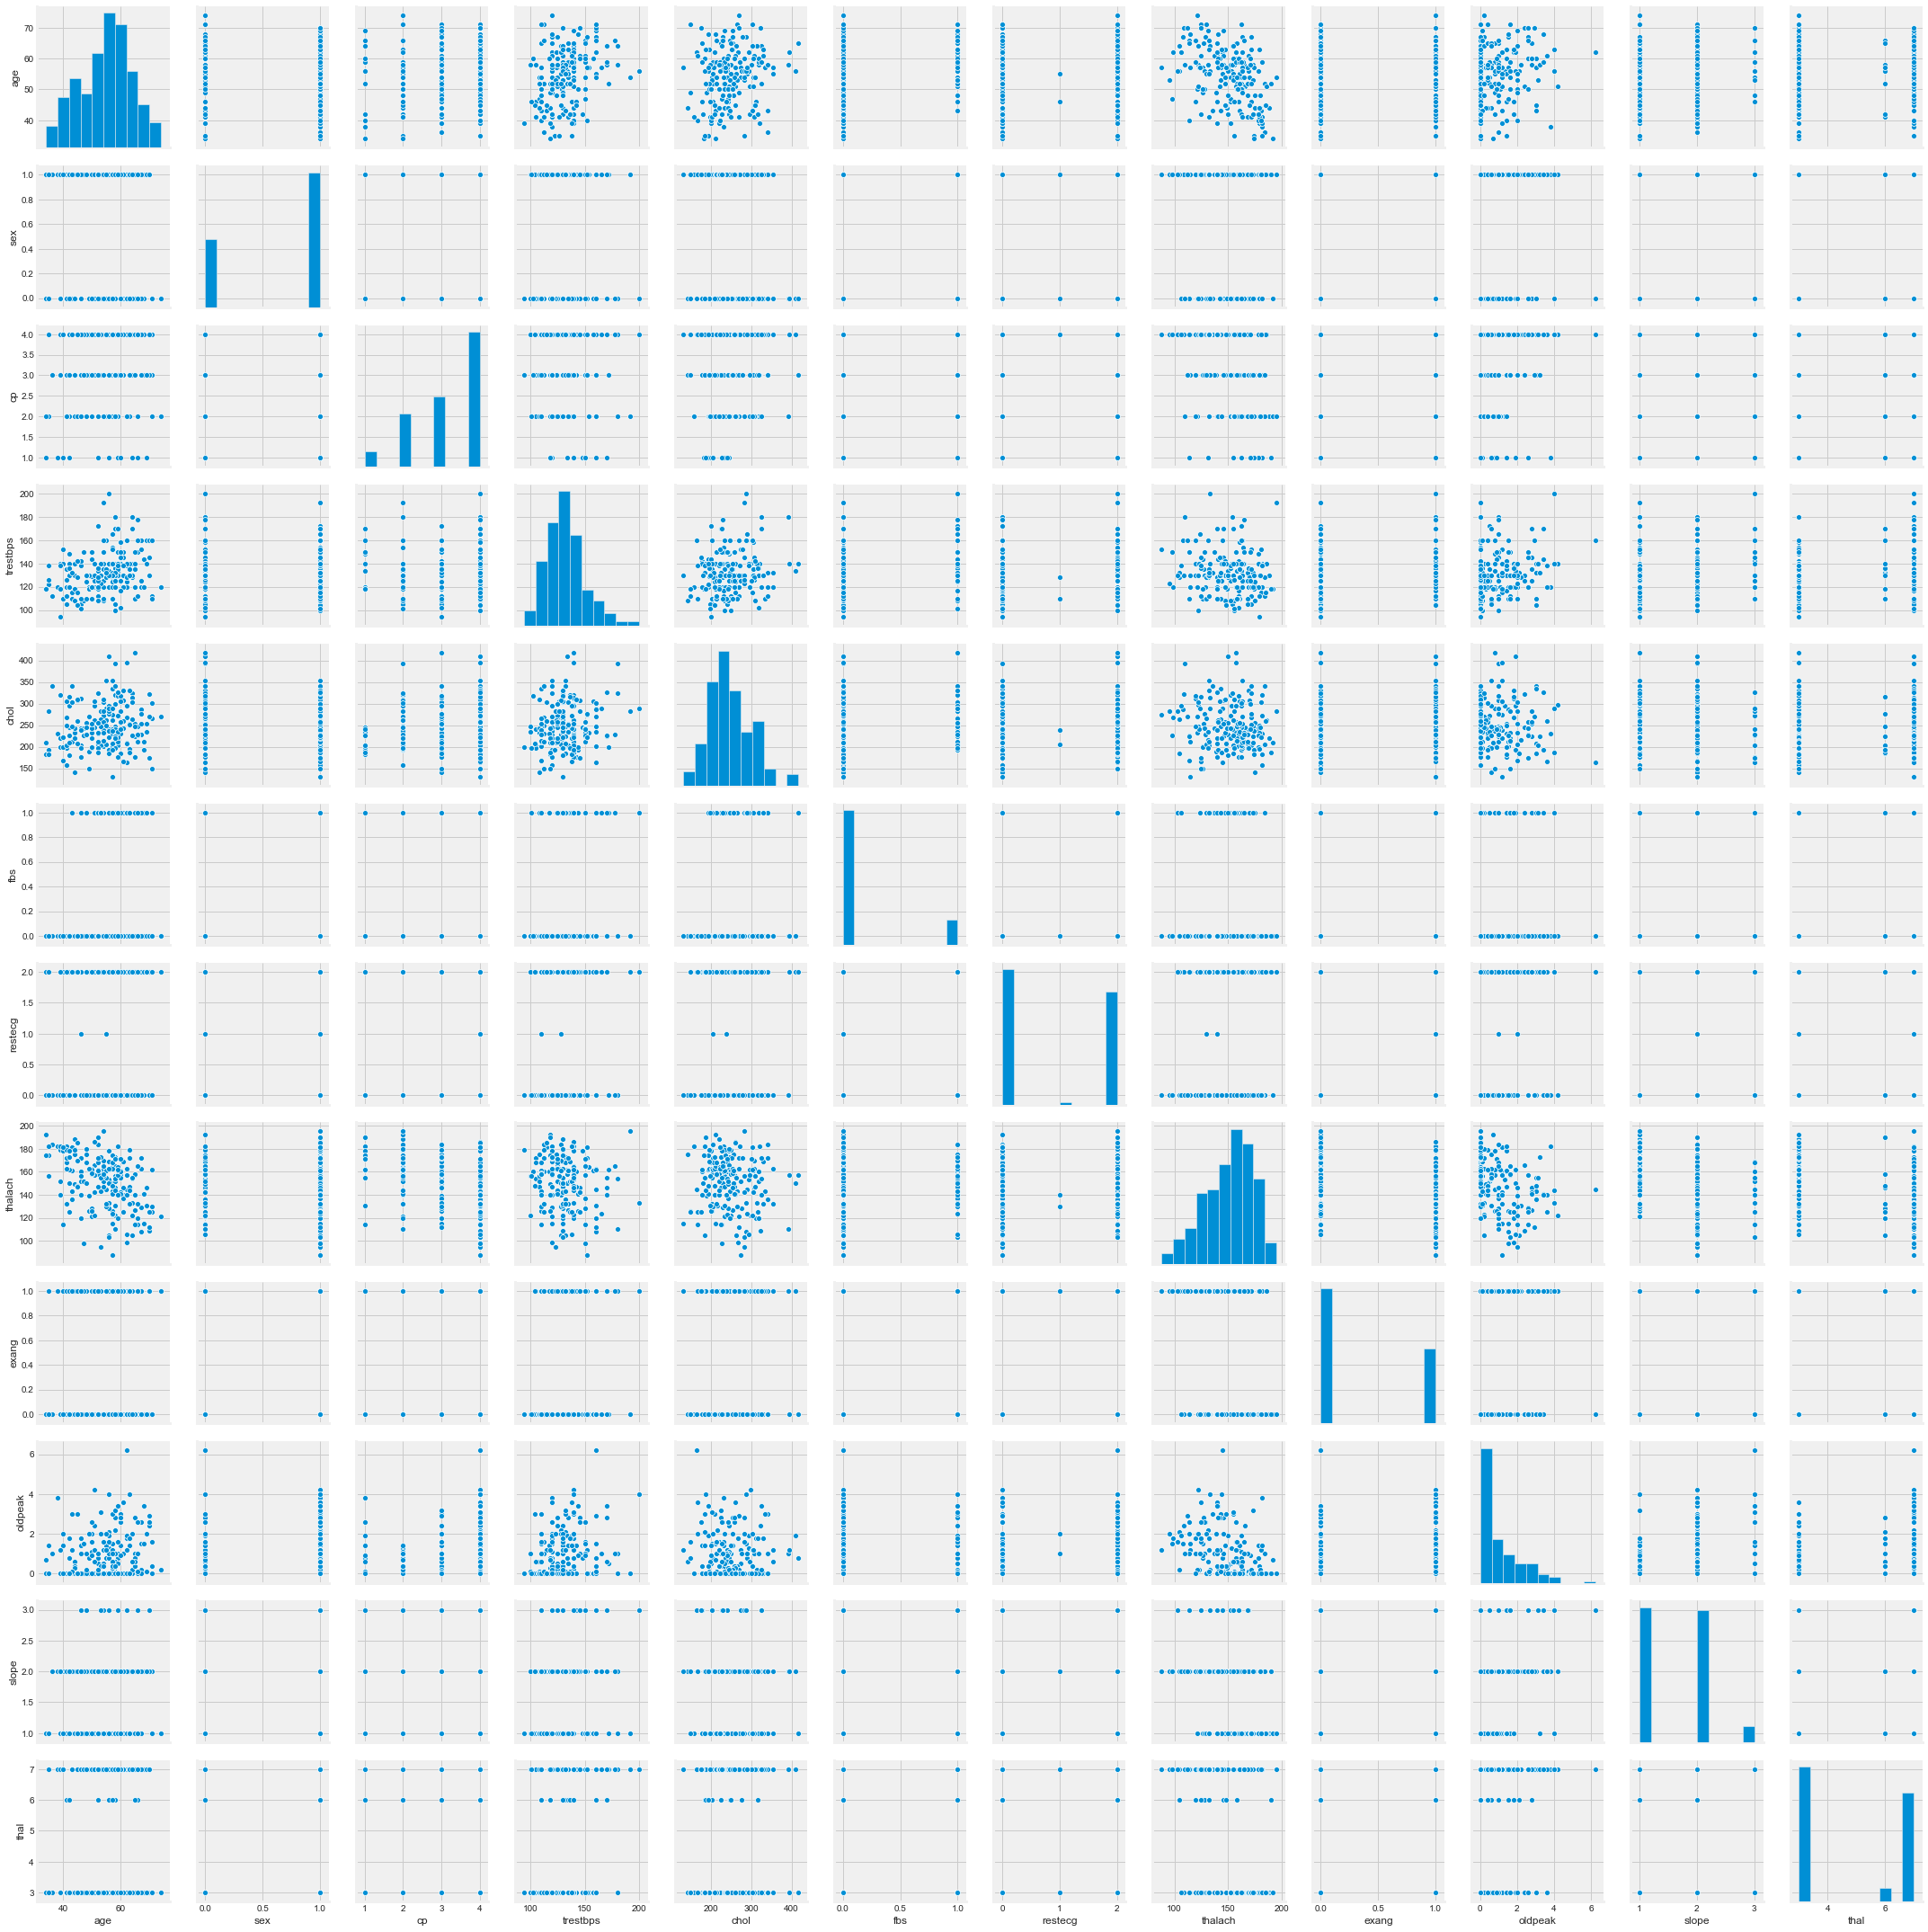

In [20]:
sb.pairplot(df_withoutna[[column for column in df.columns if not column in ['patientid', 'hd']]])

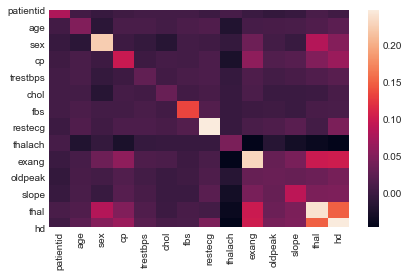

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_values = min_max_scaler.fit_transform(df_withoutna.values)
sb.heatmap(np.cov(normalized_values, rowvar=False), xticklabels=df_withoutna.columns, yticklabels=df_withoutna.columns)

In [22]:
df['hd'].value_counts()

0    213
1    145
Name: hd, dtype: int64

In [23]:
df_withoutna['hd'].value_counts()

0    108
1     83
Name: hd, dtype: int64

In [24]:
df_withoutna.head()

patientid  age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0   65    1   4     135.0  254.0  0.0      2.0    127.0    0.0   
1          4   50    1   4     130.0  233.0  0.0      0.0    121.0    1.0   
3         11   46    0   2     105.0  204.0  0.0      0.0    172.0    0.0   
4         12   58    0   4     100.0  248.0  0.0      2.0    122.0    0.0   
5         13   54    1   3     125.0  273.0  0.0      2.0    152.0    0.0   

   oldpeak  slope  thal  hd  
0      2.8    2.0   7.0   1  
1      2.0    2.0   7.0   1  
3      0.0    1.0   3.0   0  
4      1.0    2.0   3.0   0  
5      0.5    3.0   3.0   0

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x = df_withoutna.drop(columns=['hd', 'patientid'], axis=1).values

In [28]:
y = df_withoutna['hd'].values

In [29]:
x.shape

(191, 12)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

In [31]:
x_train.shape

(133, 12)

In [32]:
x_test.shape

(58, 12)

In [33]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [35]:
knn_pred = knn.predict(x_test)

In [36]:
knn_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
print(accuracy_score(y_test, knn_pred))

0.5862068965517241


In [38]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_scaled_train = standard_scaler.fit_transform(x_train)
x_scaled_test = standard_scaler.transform(x_test)

In [39]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(x_scaled_train, y_train)
knn_s_pred = knn_scaled.predict(x_scaled_test)
print(accuracy_score(y_test, knn_s_pred))

0.7413793103448276


In [40]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=1)
gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished
c:\users\mrajewsk\desktop\ai_aware\digital-wks-dsc\env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
gs_results.best_score_

0.631578947368421

In [42]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
print(accuracy_score(y_test, tree_pred))

0.7241379310344828


In [43]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
lr_pred = log_reg.predict(x_test)
print(accuracy_score(y_test, lr_pred))

0.8275862068965517


c:\users\mrajewsk\desktop\ai_aware\digital-wks-dsc\env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=1)

In [52]:
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)

In [53]:
print(accuracy_score(y_test, mlp_pred))

0.5517241379310345
